In [4]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
all_df = pd.merge(ride_df,city_df,on="city")
# Display the data table for preview
all_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

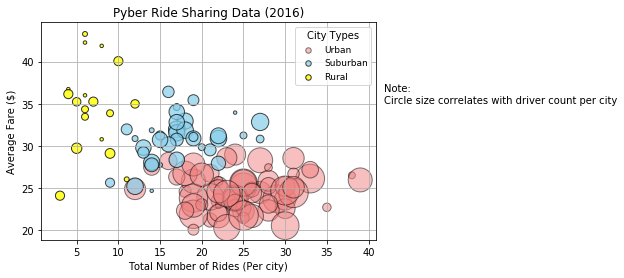

In [5]:
# Obtain the x and y coordinates for each of the three city types
#group data by city, ride, and driver count
all_group = all_df.groupby(["city","type","driver_count"])

#build a new df with total rides per city and the avg of the fares
new_df = pd.DataFrame({"ride":all_group["ride_id"].count(),"fare":all_group["fare"].mean()})

#turn driver_count index back into a column
final_new_df = new_df.reset_index(level=['driver_count'])

#build three new df's to split out the types
urban_df = final_new_df.xs('Urban',level='type')
sub_df = final_new_df.xs('Suburban',level='type')
rural_df = final_new_df.xs('Rural',level='type')

# Build the scatter plots for each city types
plt.scatter(urban_df["ride"],urban_df["fare"],s=urban_df["driver_count"]*12,c="lightcoral",marker="o",edgecolors="black",alpha=0.5,label="Urban")
plt.scatter(sub_df["ride"],sub_df["fare"],s=sub_df["driver_count"]*12,c="skyblue",marker="o",edgecolors="black",alpha=0.7,label="Suburban")
plt.scatter(rural_df["ride"],rural_df["fare"],s=rural_df["driver_count"]*12,c="yellow",marker="o",edgecolors="black",alpha=0.8,label="Rural")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Total Number of Rides (Per city)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
legend = plt.legend(title="City Types",loc="best",fontsize=9)
for l in legend.legendHandles:
    l.set_sizes([30.0])
    
# Incorporate a text label regarding circle size
note_txt = "Note:\nCircle size correlates with driver count per city"
plt.gcf().text(0.92,0.6,note_txt,fontsize=10)

# Save Figure
plt.savefig("Pyber_Ride_share_2016.png")

## Total Fares by City Type

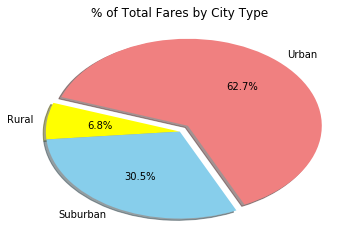

In [6]:
# Calculate Type Percents
new_df["Total Fare"] = all_group["fare"].sum()
u_f_df = new_df.xs("Urban",level="type")
s_f_df = new_df.xs("Suburban",level="type")
r_f_df = new_df.xs("Rural",level="type")
uFare = round((u_f_df["Total Fare"].sum()/new_df["Total Fare"].sum())*100,1)
sFare = round((s_f_df["Total Fare"].sum()/new_df["Total Fare"].sum())*100,1)
rFare = round((r_f_df["Total Fare"].sum()/new_df["Total Fare"].sum())*100,1)
fares = [uFare,rFare,sFare]
labels=["Urban","Rural","Suburban"]
# Build Pie Chart
plt.pie(fares,explode=[0.09,0,0],labels=labels,colors=["lightcoral","yellow","skyblue"],autopct='%.1f%%',startangle=-65.0,shadow=True)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("Percent_of_fares_by_type.png")

## Total Rides by City Type

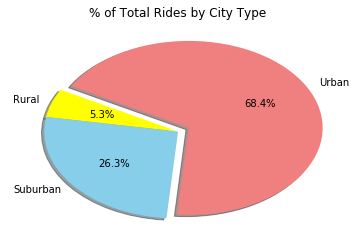

In [7]:
# Calculate Ride Percents
u_r_df = new_df.xs("Urban",level="type")
s_r_df = new_df.xs("Suburban",level="type")
r_r_df = new_df.xs("Rural",level="type")
uRide = u_r_df["ride"].sum()
sRide = s_r_df["ride"].sum()
rRide = r_r_df["ride"].sum()
tRide = uRide+sRide+rRide
upRide = round((uRide/tRide)*100,1)
spRide = round((sRide/tRide)*100,1)
rpRide = round((rRide/tRide)*100,1)
rides=[upRide,rpRide,spRide]
labels=["Urban","Rural","Suburban"]
# Build Pie Chart
plt.pie(rides,explode=[0.09,0,0],labels=labels,colors=["lightcoral","yellow","skyblue"],autopct='%.1f%%',startangle=-95.0,shadow=True)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("Percent_of_rides_by_type.png")

## Total Drivers by City Type

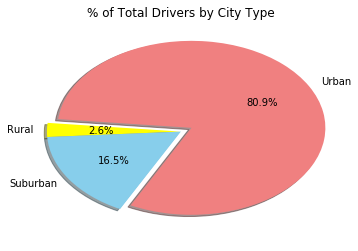

In [8]:
# Calculate Driver Percents
u_d_df = final_new_df.xs("Urban",level="type")
s_d_df = final_new_df.xs("Suburban",level="type")
r_d_df = final_new_df.xs("Rural",level="type")
uDriver = u_d_df["driver_count"].sum()
sDriver = s_d_df["driver_count"].sum()
rDriver = r_d_df["driver_count"].sum()
tDriver = uDriver+rDriver+sDriver
udPerc = round((uDriver/tDriver)*100,1)
rdPerc = round((rDriver/tDriver)*100,1)
sdPerc = round((sDriver/tDriver)*100,1)
drv=[udPerc,rdPerc,sdPerc]
labels=["Urban","Rural","Suburban"]
# Build Pie Charts
plt.pie(drv,explode=[0.09,0,0],labels=labels,colors=["lightcoral","yellow","skyblue"],autopct='%.1f%%',startangle=-117.0,shadow=True)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Percent_of_drivers_by_type.png")

Data Musings

1. Although there are fewer fares in rural areas they tend to have a higher dollar value.
2. Suburan drivers seem to have a decent amount of fares and lower compition due to the lower number of drivers.
3. Urban drivers get the most rides but there is greater compition for those fares.